<a href="https://colab.research.google.com/github/KumuthuA/ml-project/blob/main/layer_12_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from google.colab import drive

In [2]:
global labels
global features
labels = [f"label_{i+1}" for i in range(4)]
features = [f'feature_{i+1}' for i in range(768)]
label_1 = labels[0]
label_2 = labels[1]
label_3 = labels[2]
label_4 = labels[3]

In [3]:
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML/ML project/Layer 12"
train = pd.read_csv(f"{WORKING_DIR}/layer_12_train.csv")
valid = pd.read_csv(f"{WORKING_DIR}/layer_12_valid.csv")
test = pd.read_csv(f"{WORKING_DIR}/layer_12_test.csv")

Mounted at /content/drive


# Defining functions

In [4]:
def data_preprocess(train_df, valid_df, test_df, label):
    scaler = StandardScaler()

    # Apply feature scaling to training data
    X_train = pd.DataFrame(scaler.fit_transform(train_df.drop(labels, axis=1)), columns=features)
    y_train = train_df[label]

    # Apply feature scaling to validation data
    X_valid = pd.DataFrame(scaler.transform(valid_df.drop(labels, axis=1)), columns=features)
    y_valid = valid_df[label]

    # Apply feature scaling to test data
    X_test = pd.DataFrame(scaler.transform(test_df.drop(labels, axis=1)), columns=features)
    y_test = test_df[label]
    return X_train, y_train, X_valid, y_valid, X_test

In [ ]:
def feature_engineering_with_pca(X_train, X_valid, X_test, n_components):

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components)

    # Create a new DataFrame with the PCA-transformed features
    X_train_pca = pca.fit_transform(X_train)
    X_train_df_pca = pd.DataFrame(X_train_pca)
    X_valid_df_pca = pd.DataFrame(pca.transform(X_valid))
    X_test_df_pca = pd.DataFrame(pca.transform(X_test))
    print("Shape for label3 train set:", X_train_df_pca.shape)
    print("Shape for label3 validation set:", X_valid_df_pca.shape)
    print("Shape for label3 validation set:", X_test_df_pca.shape)

    return X_train_df_pca, X_valid_df_pca, X_test_df_pca

In [ ]:
def feature_engineering_with_select_kbest(X_train, y_train, X_valid, X_test, n):
    selector = SelectKBest(f_classif, k=n)
    X_train_df = selector.fit_transform(X_train, y_train)
    X_valid_df = selector.transform(X_valid)
    X_test_df = selector.transform(X_test)
    print("Shape for label3 train set:", X_train_df_pca.shape)
    print("Shape for label3 validation set:", X_valid_df_pca.shape)
    print("Shape for label3 validation set:", X_test_df_pca.shape)
    return X_train_df, X_valid_df, X_test_df

In [ ]:
def build_knn_model(X_train, y_train, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    return knn

In [ ]:
def build_svc_model(X_train, y_train):
    svc_model = SVC(kernel='linear', gamma='scale')
    svc_model.fit(X_train, y_train)
    return svc_model

In [ ]:
def evaluate(y_valid, y_pred):
    print(f"Accuracy: {accuracy_score(y_valid, y_pred)}")
    print(f"F1 Score: {f1_score(y_valid, y_pred, average='weighted')}")
    print(f"Precision: {precision_score(y_valid, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_valid, y_pred, average='weighted')}")

# Data preprocessing

In [5]:
X_train_3, y_train_3, X_valid_3, y_valid_3, X_test_3 = data_preprocess(train, valid, test, label_3)
y_train_3.info()

<class 'pandas.core.series.Series'>
RangeIndex: 28520 entries, 0 to 28519
Series name: label_3
Non-Null Count  Dtype
--------------  -----
28520 non-null  int64
dtypes: int64(1)
memory usage: 222.9 KB


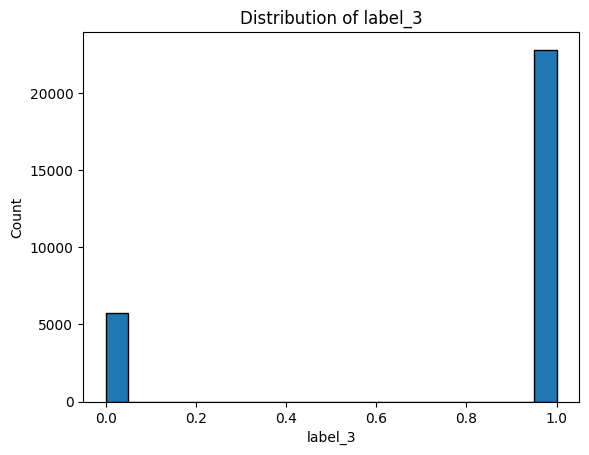

In [6]:
plt.hist(y_train_3, bins=20, edgecolor='k')
plt.xlabel(label_3)
plt.ylabel('Count')
plt.title(f'Distribution of {label_3}')
plt.show()

# Cross validation - Lable 03

In [7]:
svc_model = SVC()
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

svc_scores = cross_val_score(svc_model, X_train_3, y_train_3, cv=kfold)
print("SVC Cross-Validation Scores:")
for i, score in enumerate(svc_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
svc_mean_accuracy = svc_scores.mean()
print(f"Mean Accuracy (SVC): {svc_mean_accuracy:.2f}")

knn_scores = cross_val_score(knn_model, X_train_3, y_train_3, cv=kfold)
print("\nKNN Cross-Validation Scores:")
for i, score in enumerate(knn_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
knn_mean_accuracy = knn_scores.mean()
print(f"Mean Accuracy (KNN): {knn_mean_accuracy:.2f}")

rf_scores = cross_val_score(rf_model, X_train_3, y_train_3, cv=kfold)
print("Random Forest Cross-Validation Scores:")
for i, score in enumerate(rf_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
rf_mean_accuracy = rf_scores.mean()
print(f"Mean Accuracy (Random Forest): {rf_mean_accuracy:.2f}")

SVC Cross-Validation Scores:
Fold 1 - Accuracy: 0.99
Fold 2 - Accuracy: 0.99
Fold 3 - Accuracy: 0.99
Fold 4 - Accuracy: 0.99
Fold 5 - Accuracy: 0.99
Mean Accuracy (SVC): 0.99

KNN Cross-Validation Scores:
Fold 1 - Accuracy: 0.95
Fold 2 - Accuracy: 0.94
Fold 3 - Accuracy: 0.94
Fold 4 - Accuracy: 0.95
Fold 5 - Accuracy: 0.94
Mean Accuracy (KNN): 0.95
Random Forest Cross-Validation Scores:
Fold 1 - Accuracy: 0.92
Fold 2 - Accuracy: 0.91
Fold 3 - Accuracy: 0.91
Fold 4 - Accuracy: 0.91
Fold 5 - Accuracy: 0.91
Mean Accuracy (Random Forest): 0.91


# Feature reduction using PCA for label 03

In [ ]:
X_train_3_pca, X_valid_3_pca, X_test_3_pca = feature_engineering_with_pca(X_train_3, X_valid_3, X_test_3, n_components=0.95)

Shape for label3 train set: (28520, 112)
Shape for label3 validation set: (750, 112)
Shape for label3 validation set: (750, 112)


In [ ]:
model_3_pca_svc = SVC(kernel='rbf')
model_3_pca_svc.fit(X_train_3_pca, y_train_3)
y_pred_3_svc = model_3_pca_svc.predict(X_valid_3_pca)

print(confusion_matrix(y_valid_3, y_pred_3_svc))
evaluate(y_valid_3, y_pred_3_svc)

[[138   4]
 [  2 606]]
Accuracy: 0.992
F1 Score: 0.9919781993501731
Precision: 0.9919793911007024
Recall: 0.992


# Hyperparameter tuning for label 3

In [ ]:
param_grid_3 = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

model_3_svc = SVC()

grid_search_3 = GridSearchCV(estimator=model_3_svc, param_grid=param_grid_3, cv=5, verbose=3, n_jobs=-1, scoring='accuracy')

grid_search_3.fit(X_train_3_pca, y_train_3)

best_params_3 = grid_search_3.best_params_
best_model_3 = grid_search_3.best_estimator_

valid_accuracy_3 = best_model_3.score(X_valid_3_pca, y_valid_3)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params_3)
print("Test Accuracy:", valid_accuracy_3)

# Predicting label 3

In [ ]:
y_pred_3 = model_3_pca_svc.predict(X_test_3_pca)
output_df_3 = pd.DataFrame({'ID': range(1, len(y_pred_3) + 1), 'label_3': y_pred_3})

output_file_path_3 = f"{WORKING_DIR}/layer_12_3_today.csv"
output_df_3.to_csv(output_file_path_3, index=False)
print(f'Predictions saved to {output_file_path_3}')

Predictions saved to /content/drive/MyDrive/ML/ML project/Layer 12/layer_12_3_today.csv


In [ ]:
y_pred_3_train = model_3_pca_svc.predict(X_train_3_pca)
output_df_3_train = pd.DataFrame({'ID': range(1, len(y_pred_3_train) + 1), 'label_3': y_pred_3_train})

output_file_path_3 = f"{WORKING_DIR}/layer_12_3_train.csv"
output_df_3_train.to_csv(output_file_path_3, index=False)
print(f'Predictions saved to {output_file_path_3}')

Predictions saved to /content/drive/MyDrive/ML/ML project/Layer 12/layer_12_3_train.csv
